# Introduction

**BKK Night Data** - analysing services between 23:00-05:00

**Duration:** 2020-11-09 - 2021-01-01

*Data was created and downloaded before the second wave lockdown.*

**Source**: https://www.bkk.hu/apps/gtfs/


# Pandas

In [2]:
# Standard libaries for DataFrame, Dtypes & I/O
import numpy as np
import pandas as pd
import datetime

# Plotting - Matplotlib, Plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pygeos
import geopandas
# Profile report
from pandas_profiling import ProfileReport

# Warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.



Reading in the datas.

In [3]:
# Date parser(s)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# Agency
agency = pd.read_csv("big_data/agency.csv")
# Calander_dates
calendar_dates = pd.read_csv("big_data/calendar_dates.csv", parse_dates=['date'])
# Feed_info
feed_info = pd.read_csv("big_data/feed_info.csv", parse_dates=['feed_start_date', 'feed_end_date'])
# Pathways
pathways = pd.read_csv("big_data/pathways.csv")
# Routes
routes = pd.read_csv("big_data/routes.csv")
# Shapes
shapes = pd.read_csv("big_data/shapes.csv")
# Stop_times
stop_times = pd.read_csv("big_data/stop_times.csv")
# Stops
stops = pd.read_csv("big_data/stops.csv")
# Trips
trips = pd.read_csv("big_data/trips.csv")

## EDA

Finding foreign keys:

In [4]:
# Duplicated columns - foreign keys between tables
col_dict={}
for df in [calendar_dates, pathways, routes, shapes, stop_times, stops, trips]:
    for i in (list(df.columns)):
        if i not in col_dict.keys():
            col_dict[i]=1
        else:
            col_dict[i]=col_dict[i]+1
cols=pd.DataFrame(col_dict.items(), columns=['colnames','freq'])

# Displaying the created table
print('Columns frequency >= 2:')
print(cols[cols['freq']>1])

Columns frequency >= 2:
               colnames  freq
0            service_id     2
10             route_id     2
18             shape_id     2
22  shape_dist_traveled     2
23              trip_id     2
24              stop_id     2


### Agency

*   agency_id - a szervezet ID-ja
*   agency_name - a szervezet neve
*   agency_timezone - a szervezet időzonája
*   agency_lang - a szevezet által használt nyelv
*   agency_phone - a szervezet telefonszáma

In [5]:
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,BKK,BKK,http://www.bkk.hu,Europe/Budapest,hu,+36 1 3 255 255


In [6]:
agency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agency_id        1 non-null      object
 1   agency_name      1 non-null      object
 2   agency_url       1 non-null      object
 3   agency_timezone  1 non-null      object
 4   agency_lang      1 non-null      object
 5   agency_phone     1 non-null      object
dtypes: object(6)
memory usage: 176.0+ bytes


Shows information about the company: name, URL, timezone, language, phone number. 

### Feed info

*   feed_id - az adatok ID-ja
*   feed_publisher_name - az adatokat publikáló cég neve
*   feed_publisher_url - a publikáló URL-je
*   feed_lang - az adatok nyelve
*   feed_start_date - az adatok kezdeti dátuma
*   feed_end_date - az adatok záró dátuma
*   feed_version - az adatok veriószáma
*   feed_ext_version - az adatok kibővített veriószáma

In [7]:
feed_info.head()

,feed_id,feed_publisher_name,feed_publisher_url,feed_lang,feed_start_date,feed_end_date,feed_version,feed_ext_version
0,BKK,BKK Zrt.,http://www.bkk.hu,hu,2020-11-09,2021-01-01,L2703-20201109,643


In [8]:
feed_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   feed_id              1 non-null      object        
 1   feed_publisher_name  1 non-null      object        
 2   feed_publisher_url   1 non-null      object        
 3   feed_lang            1 non-null      object        
 4   feed_start_date      1 non-null      datetime64[ns]
 5   feed_end_date        1 non-null      datetime64[ns]
 6   feed_version         1 non-null      object        
 7   feed_ext_version     1 non-null      int64         
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 192.0+ bytes


Shows information about the data's publisher, the dates between the data was recorded (2020-11-09	2021-01-01) and version.

### Calendar dates

*   service_id - szolgáltatás, járat azonosítója
*   date - a nap leírása az év, hónap és nap alapján

In [9]:
# Remove exception_type - constant value
calendar_dates = calendar_dates.drop(['exception_type'], axis=1)

calendar_dates.head(10)

,service_id,date
0,B19147EVVHPBP-0011,2020-12-28
1,B19147EVVHPBP-0011,2020-12-29
2,B19147EVVHPBP-0011,2020-12-30
3,B19147EVVHPBP-0011,2020-12-31
4,B19601AHCTL-0011,2020-12-01
5,B19601AHCTL-0011,2020-12-02
6,B19601AHCTL-0011,2020-12-03
7,B19601AHCTL-0011,2020-12-07
8,B19601AHCTL-0011,2020-12-08
9,B19601AHCTL-0011,2020-12-09


In [10]:
calendar_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12857 entries, 0 to 12856
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   service_id  12857 non-null  object        
 1   date        12857 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 201.0+ KB


In [11]:
# TOP 10 Dates
calendar_dates['date'].value_counts()[:10]

2020-11-12    251
2020-11-13    251
2020-11-11    251
2020-11-09    251
2020-11-10    251
2020-11-27    250
2020-11-16    250
2020-11-17    250
2020-11-30    250
2020-11-26    250
Name: date, dtype: int64

Shows information about the recorded dates and services IDs given that day.

### Pathway

*   pathway_id - egy csomóponton belüli két állomás közötti szakasz azonosítója
*   pathway_mode - szakasz típusának leírása
*   is_biderctional - kétirányú-e a szakasz, 1 igen, 0 nem
*   from_stop_id - útszakasz kezdő megállója
*   to_stop_id - útszakaszt lezáró megálló
*   traversal_time - az útszakasz megtételéhez szükséges idő másodperc

In [12]:
pathways.head(10)

,pathway_id,pathway_mode,is_bidirectional,from_stop_id,to_stop_id,traversal_time
0,LM4KF1-LM4KFA,2,1,LM4KF1,LM4KFA,30
1,LM4KF1-LM4KFB,2,1,LM4KF1,LM4KFB,150
2,LM4KF1-LM4KFC,2,1,LM4KF1,LM4KFC,150
3,LM4KF3-LM4KFC,2,1,LM4KF3,LM4KFC,90
4,LM4KF1-LM4KFD,2,1,LM4KF1,LM4KFD,180
5,LM4KF3-LM4KFD,2,1,LM4KF3,LM4KFD,120
6,LM4KF3-LM4KFA,2,1,LM4KF3,LM4KFA,90
7,LM4KF3-LM4KFB,2,1,LM4KF3,LM4KFB,90
8,LM1OPV-F01079,2,1,LM1OPV,F01079,30
9,LM1DF1-F00962,2,1,LM1DF1,F00962,30


In [13]:
pathways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pathway_id        352 non-null    object
 1   pathway_mode      352 non-null    int64 
 2   is_bidirectional  352 non-null    int64 
 3   from_stop_id      352 non-null    object
 4   to_stop_id        352 non-null    object
 5   traversal_time    352 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.6+ KB


In [14]:
pathways.describe()

,pathway_mode,is_bidirectional,traversal_time
count,352.000000,352.000000,352.000000
mean,2.309659,0.880682,59.232955
std,1.095506,0.324624,34.428294
min,1.000000,0.000000,0.000000
25%,2.000000,1.000000,30.000000
50%,2.000000,1.000000,60.000000
75%,2.000000,1.000000,90.000000
max,5.000000,1.000000,180.000000


In [15]:
# Visualising traversal time
vis_data = pathways.traversal_time.value_counts()

fig = px.bar(vis_data, x=vis_data.index, y=vis_data, labels={
                     "x": "Traversal time (sec)",
                     "y": "Number of pathways"
                 })
fig.update_yaxes(title_text='Number of arrivals', row=1, col=1)
fig.update_xaxes(title_text='Traversal time (sec)', row=1, col=1)
fig.update_layout(autosize=True, width=1200, height=500,
    title='Traversal time distribution',
)
fig.show()

In [16]:
# Visualising is bidirectional
vis_data = pathways.is_bidirectional.value_counts()

fig = px.bar(vis_data, y=vis_data, labels={
                     "y": "Number of arrivals"
                 })
fig.update_yaxes(title_text='Number of pathways', row=1, col=1)
fig.update_xaxes(title_text='Is bidirectional', row=1, col=1)
fig.update_layout(autosize=True, width=1200, height=500,
    title='Is bidirectional - distribution',
)
fig.show()

Shows information about the pathways traversal time between stops, if the pathway is bidirectional.

### Routes

*   agency_id - működtető szervezet azonosítója
*   route_id - járat azonosítója
*   route_short_name - járat rövid neve, pl.: busz szám
*   route_long_name - hévek esetén a konkrét hév vonal neve
*   route_type - járat típusa
*   route_desc - leírás, a két végállomás
*   route_color - kijelzés estén az útvonal szine
*   route_text_color - kijelzés estén az útvonal nevéhez szín
*   route_sort_order - sorbarenedzéshez sorszám

In [17]:
# Remove agency_id - constant value
routes = routes.drop(['agency_id'], axis=1)
routes.head(10)

,route_id,route_short_name,route_long_name,route_type,route_desc,route_color,route_text_color,route_sort_order
0,0050,5,NaN,3,"Pasaréti tér / Rákospalota, Kossuth utca",009FE3,FFFFFF,22
1,0070,7,NaN,3,"Albertfalva vasútállomás / Újpalota, Nyírpalot...",009FE3,FFFFFF,25
2,0075,7E,NaN,3,"Blaha Lujza tér M / Újpalota, Nyírpalota út",009FE3,FFFFFF,26
3,0078,7G,NaN,3,"Cinkotai autóbuszgarázs / Újpalota, Nyírpalota út",009FE3,FFFFFF,27
4,0085,8E,NaN,3,"Kelenföld vasútállomás M / Újpalota, Nyírpalot...",009FE3,FFFFFF,28
5,0090,9,NaN,3,"Óbuda, Bogdáni út / Kőbánya alsó vasútállomás",009FE3,FFFFFF,29
6,0100,10,NaN,3,Örs vezér tere M+H / Örs vezér tere M+H,009FE3,FFFFFF,30
7,0110,11,NaN,3,Batthyány tér M+H / Nagybányai út,009FE3,FFFFFF,31
8,0130,13,NaN,3,"Budatétény vasútállomás (Campona) / Diósd, Búz...",009FE3,FFFFFF,33
9,0131,13A,NaN,3,"Budatétény vasútállomás (Campona) / Diósd, Sas...",009FE3,FFFFFF,34


In [18]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   route_id          355 non-null    object
 1   route_short_name  355 non-null    object
 2   route_long_name   9 non-null      object
 3   route_type        355 non-null    int64 
 4   route_desc        355 non-null    object
 5   route_color       355 non-null    object
 6   route_text_color  355 non-null    object
 7   route_sort_order  355 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 22.3+ KB


In [19]:
# Visualising route color
vis_data = routes.route_color.value_counts()

fig = px.bar(vis_data, x=vis_data.index, y=vis_data, labels={
                     "x": "Color",
                     "y": "Number of routes given this color"
                 })
fig.update_yaxes(title_text='Number of routes', row=1, col=1)
fig.update_xaxes(title_text='Color', row=1, col=1)
fig.update_layout(autosize=True, width=1200, height=500,
    title='Route colors',
)
fig.show()

In [20]:
# Text colors
vis_data = routes.route_text_color.value_counts()
vis_data

FFFFFF    319
000000     36
Name: route_text_color, dtype: int64

Shows information about the routes: route's short and long name, used colour, route's type, description. (the 2 stops between the route is)

### Shapes

*   shape_id - pálya azonosítója
*   shape_pt_sequence - pályarész
*   shape_pt_lat - pályarész szélességi elhelyezkedése
*   shape_pt_lon - pályarész hosszúsági elhelyezkedése
*   shape_dist_traveled - a pályarész hossza

In [21]:
shapes.head(10)

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
0,0285,100001,47.519648,19.148326,0.0
1,0285,100002,47.519666,19.148313,2.0
2,0285,100003,47.519839,19.148638,31.0
3,0285,100004,47.520584,19.150246,178.0
4,0285,100005,47.520674,19.150432,195.0
5,0285,100006,47.520727,19.150486,202.0
6,0285,100007,47.520790,19.150512,209.0
7,0285,100008,47.520988,19.150964,249.0
8,0285,100009,47.521320,19.151695,315.0
9,0285,100010,47.521498,19.152114,354.0


In [22]:
shapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381659 entries, 0 to 381658
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   shape_id             381659 non-null  object 
 1   shape_pt_sequence    381659 non-null  int64  
 2   shape_pt_lat         381659 non-null  float64
 3   shape_pt_lon         381659 non-null  float64
 4   shape_dist_traveled  381659 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.6+ MB


In [23]:
shapes.describe()

,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
count,3.816590e+05,381659.000000,381659.000000,381659.000000
mean,3.636115e+05,47.476708,19.078418,7247.058440
std,6.926636e+05,0.059528,0.083542,6721.752886
min,1.000000e+00,47.175502,18.879311,0.000000
25%,7.000200e+04,47.440076,19.023746,2340.000000
50%,1.400070e+05,47.479725,19.069298,5424.000000
75%,2.900160e+05,47.511543,19.129039,10059.000000
max,6.200009e+06,47.660994,19.359085,45863.000000


Shows geographical data about the routes. Contains: sequence numbers, longitude, latitude data and distance.

### Trips

*   route_id - konkrét utazás azonosítója
*   trip_id - járat azonosítója
*   service_id - szolgáltatás azonosítója
*   trip_headsign - a kijelzett célállomás
*   direction_id - irány
*   block_id - service_id megállokra bontva
*   shape_id - pálya azonosítója
*   wheelchair_accessible - kerekesszékkel utazás lehetséges-e 1-2  (nem-igen)
*   bikes_allowed - kerékpár szállítása megengedett-e 1-2 (nem-igen)
*   boarding_door - elől felszállós-e a jármű

In [24]:
# Convert bikes_allowed to integer type - where nan was originally filled with 1
# Convert boarding_door to integer type - where nan was originally filled with 1
trips['bikes_allowed'] = trips['bikes_allowed'].fillna(1)
trips['boarding_door'] = trips['boarding_door'].fillna(1)
trips['bikes_allowed'] = trips['bikes_allowed'].astype(int)
trips['boarding_door'] = trips['boarding_door'].astype(int)

trips.head(10)

,route_id,trip_id,service_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,boarding_door
0,5200,B1914710,B19147EVVHPBP-0011,Örs vezér tere,0,B19147EVVHPBP-0011_01,1112,1,2,1
1,5200,B19147100,B19147EVVHPBP-0011,Déli pályaudvar,1,B19147EVVHPBP-0011_03,1111,1,2,1
2,5200,B19147101,B19147EVVHPBP-0011,Örs vezér tere,0,B19147EVVHPBP-0011_03,1112,1,2,1
3,5200,B19147102,B19147EVVHPBP-0011,Déli pályaudvar,1,B19147EVVHPBP-0011_03,1111,1,2,1
4,5200,B19147103,B19147EVVHPBP-0011,Örs vezér tere,0,B19147EVVHPBP-0011_03,1112,1,2,1
5,5200,B19147104,B19147EVVHPBP-0011,Déli pályaudvar,1,B19147EVVHPBP-0011_03,1111,1,2,1
6,5200,B19147105,B19147EVVHPBP-0011,Örs vezér tere,0,B19147EVVHPBP-0011_03,1112,1,2,1
7,5200,B19147106,B19147EVVHPBP-0011,Déli pályaudvar,1,B19147EVVHPBP-0011_03,1111,1,2,1
8,5200,B19147107,B19147EVVHPBP-0011,Örs vezér tere,0,B19147EVVHPBP-0011_03,1112,1,2,1
9,5200,B19147108,B19147EVVHPBP-0011,Déli pályaudvar,1,B19147EVVHPBP-0011_03,1111,1,2,1


In [25]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228914 entries, 0 to 228913
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   route_id               228914 non-null  object
 1   trip_id                228914 non-null  object
 2   service_id             228914 non-null  object
 3   trip_headsign          228914 non-null  object
 4   direction_id           228914 non-null  int64 
 5   block_id               228914 non-null  object
 6   shape_id               228914 non-null  object
 7   wheelchair_accessible  228914 non-null  int64 
 8   bikes_allowed          228914 non-null  int64 
 9   boarding_door          228914 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 17.5+ MB


In [26]:
trips.describe()

,direction_id,wheelchair_accessible,bikes_allowed,boarding_door
count,228914.000000,228914.000000,228914.000000,228914.000000
mean,0.495693,1.215190,1.888631,1.300449
std,0.499983,0.410955,0.314590,0.458454
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,2.000000,1.000000
50%,0.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,2.000000
max,1.000000,2.000000,2.000000,2.000000


In [27]:
# TOP 10 Services
trips['service_id'].value_counts()[:10]

C22398AHCKG-1021      1865
C22416APPKG-1021      1865
C21628ASZKG-1021      1104
C22172AVVKG-1021       936
C21487REHHKMK-011      898
C21113AHCKMK-011       871
C21165APPKMK-011       863
C20400R01HPKMK-011     856
C21541REKKKMK-011      840
C06964EVVHCPER011      776
Name: service_id, dtype: int64

In [28]:
# Visualising wheelchair accessible
plot_data = trips.wheelchair_accessible.value_counts()

fig = px.bar(plot_data, x=plot_data.index, y=plot_data, labels={'x': 'Wheelchair accessible (No=1, Yes=2)', 'y': 'Number of trips'})
fig.update_yaxes(title_text='Number of trips', row=1, col=1)
fig.update_xaxes(title_text='Wheelchair accessible (No=1, Yes=2)', row=1, col=1)
fig.update_layout(autosize=True, width=1200, height=500,
    title_font=dict(size=25, family='Courier'),
    title='Wheelchair accessible trips',
)
fig.show()

In [29]:
# Visualising bikes allowed
plot_data = trips.bikes_allowed.value_counts()

fig = px.bar(plot_data, x=plot_data.index, y=plot_data, labels={'x': 'Bikes allowed (No=1, Yes=2)', 'y': 'Number of trips'})
fig.update_yaxes(title_text='Number of trips', row=1, col=1)
fig.update_xaxes(title_text='Bikes allowed (No=1, Yes=2)', row=1, col=1)
fig.update_layout(autosize=True, width=1200, height=500,
    title_font=dict(size=25, family='Courier'),
    title='Bikes allowed trips',
)
fig.show()

In [30]:
# Visualising boarding door
plot_data = trips.boarding_door.value_counts()

fig = px.bar(plot_data, x=plot_data.index, y=plot_data, labels={'x': 'Only first door allowed (No=1, Yes=2)', 'y': 'Number of trips'})
fig.update_yaxes(title_text='Number of trips', row=1, col=1)
fig.update_xaxes(title_text='Only first door allowed (No=1, Yes=2)', row=1, col=1)
fig.update_layout(autosize=True, width=1200, height=500,
    title_font=dict(size=25, family='Courier'),
    title='Only first door allowed trips',
)
fig.show()

Shows information about the different trips: IDs, headsign, direction, corresponding shape and categorical feauters like boarding door, bikes and wheelchair accessibility.

### Stops

*   stop_id - megálló azonosítója
*   stop_name - megálló neve
*   stop_lat - megálló szélességi pozíciója
*   stop_lon - megálló hosszúsági pozíciója
*   stop_code - megálló kódja, ahol van ott ugyanaz mint az id
*   location_type - megálló típusa
*   parent_station - szülő állomás
*   wheelchair_boarding - lehet-e kerekesszékkel felszállni
*   stop_direction - megálló iránya

In [31]:
# Convert wheelchair_boarding to integer type - where nan was originally filled with 1 (No)
stops['wheelchair_boarding'] = stops['wheelchair_boarding'].fillna(1)
stops['wheelchair_boarding'] = stops['wheelchair_boarding'].astype(int)

stops.head(10)

,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_type,parent_station,wheelchair_boarding,stop_direction
0,002133,"Örs vezér tere M+H, déli tárolótér",47.500366,19.135700,NaN,NaN,NaN,1,NaN
1,002138,Kőbánya alsó vasútállomás,47.483139,19.127891,NaN,NaN,NaN,2,NaN
2,003002,Puskás Ferenc Stadion M,47.500368,19.103406,NaN,NaN,NaN,1,NaN
3,003103,"Káposztásmegyer, Mogyoródi-patak",47.598778,19.121447,NaN,NaN,NaN,1,NaN
4,003105,Bécsi út / Vörösvári út,47.548817,19.029722,NaN,NaN,NaN,2,NaN
5,003106,"Örs vezér tere M+H, északi tároló",47.505160,19.136637,NaN,NaN,NaN,1,NaN
6,003118,"Óbuda, Bogdáni út",47.551471,19.041971,NaN,NaN,NaN,2,NaN
7,004716,"ÉD metró járműtelep,porta",47.469651,19.129090,NaN,NaN,NaN,2,NaN
8,004903,Örs vezér tere,47.503480,19.137211,004903,NaN,CSLM2OVE,2,NaN
9,004952,Metró KNY járműtelep (kapu),47.502234,19.132179,NaN,NaN,NaN,1,NaN


In [32]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              5921 non-null   object 
 1   stop_name            5921 non-null   object 
 2   stop_lat             5921 non-null   float64
 3   stop_lon             5921 non-null   float64
 4   stop_code            558 non-null    object 
 5   location_type        299 non-null    float64
 6   parent_station       433 non-null    object 
 7   wheelchair_boarding  5921 non-null   int64  
 8   stop_direction       5064 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 416.4+ KB


In [33]:
stops.describe()

,stop_lat,stop_lon,location_type,wheelchair_boarding,stop_direction
count,5921.000000,5921.000000,299.000000,5921.000000,5064.000000
mean,47.490085,19.088023,1.581940,1.432528,2.317141
std,0.055444,0.081416,0.494067,0.495468,101.030300
min,47.174793,18.879511,1.000000,1.000000,-180.000000
25%,47.454906,19.032622,1.000000,1.000000,-76.000000
50%,47.492725,19.081099,2.000000,1.000000,3.000000
75%,47.524060,19.133276,2.000000,2.000000,96.000000
max,47.661038,19.358893,2.000000,2.000000,180.000000


In [34]:
# TOP 10 Stops
stops['stop_name'].value_counts()[:10]

Örs vezér tere M+H            34
Széll Kálmán tér M            25
Baross utca                   22
Kőbánya-Kispest M             19
Ady Endre utca                17
Kossuth Lajos utca            16
Móricz Zsigmond körtér M      16
Kőbánya alsó vasútállomás     15
Keleti pályaudvar M           15
Göncz Árpád városközpont M    15
Name: stop_name, dtype: int64

Shows geographical data about stops: longitude, latitude, wheelchair accessibility and direction.

### Stops Times

*   trip_id - konkrét járat azonosítója
*   stop_id - megálló azonosítója
*   arrival_time - megérkezés ideje
*   departure_time - elhagyás ideje
*   stop_sequence - hanyadik megállás az úton
*   stop_headsign - kijelzendő felirat
*   shape_dist_traveled - megtett távolság indulástól méterben

In [35]:
# Remove pickup_type, drop_off_type - constant value
stop_times = stop_times.drop(['pickup_type', 'drop_off_type'], axis=1)

stop_times.head(10)

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,shape_dist_traveled
0,B1914710,F00094,07:48:15,07:48:15,0,Örs vezér tere,0.0
1,B1914710,F02481,07:49:52,07:49:52,1,Örs vezér tere,857.0
2,B1914710,F00063,07:51:37,07:51:37,2,Örs vezér tere,1857.0
3,B1914710,F00959,07:53:00,07:53:00,3,Örs vezér tere,2459.0
4,B1914710,F00961,07:55:00,07:55:00,4,Örs vezér tere,3611.0
5,B1914710,F01019,07:56:35,07:56:35,5,Örs vezér tere,4455.0
6,B1914710,F01292,07:58:00,07:58:00,6,Örs vezér tere,5095.0
7,B1914710,F01336,07:59:45,07:59:45,7,Örs vezér tere,6101.0
8,B1914710,F01325,08:02:22,08:02:22,8,Örs vezér tere,7878.0
9,B1914710,F01743,08:04:15,08:04:15,9,Örs vezér tere,8956.0


In [36]:
stop_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4426915 entries, 0 to 4426914
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              object 
 1   stop_id              object 
 2   arrival_time         object 
 3   departure_time       object 
 4   stop_sequence        int64  
 5   stop_headsign        object 
 6   shape_dist_traveled  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 236.4+ MB


Shows additional information about trips: stop id, arrival and departure times between stops, the vehicle's headsign, distance traveled.

## Mapping

The mapping dataframe helps stops with the same name be more easily groupped by using IDs - this way trips can be more easily handled and stop names can display all routes in one place.

We will use this later.

In [37]:
import networkx as nx

G = nx.Graph()
G = nx.from_pandas_edgelist(pathways, 'from_stop_id', 'to_stop_id')
interchange = [list(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [38]:
station_dict=dict([[graph[0],min(list(stops[stops['stop_id'].isin(graph)]['stop_name']), key=len)] for graph in interchange]) 
mapping=[]

for  graph in interchange:
      for id in graph:
        mapping.append([station_dict[graph[0]],graph[0],id])

mapping_interchange_df = pd.DataFrame(mapping,columns=['stop_name','stop_id','mapping_id'])
mapping_interchange_df

,stop_name,stop_id,mapping_id
0,Keleti pályaudvar,LMXKPN,LMXKPN
1,Keleti pályaudvar,LMXKPN,LMXKPJ
2,Keleti pályaudvar,LMXKPN,LM4KP2
3,Keleti pályaudvar,LMXKPN,LMXKPM
4,Keleti pályaudvar,LMXKPN,LMXKPG
...,...,...,...
246,Mexikói út,F02888,LM1MUM
247,Bajcsy-Zsilinszky út,F00997,F00997
248,Bajcsy-Zsilinszky út,F00997,LM1BZM
249,Bajza utca,LM1BUV,LM1BUV


## Pandas Profiling

Pandas Profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. Besides, if this is not enough to convince us to use this tool, it also generates interactive reports in web format.

In [39]:
profile = ProfileReport(stop_times, title='Stop Times - Pandas Profiling Report', progress_bar=False)
profile = ProfileReport(calendar_dates, title='Calendar Dates - Pandas Profiling Report', progress_bar=False)
profile = ProfileReport(pathways, title='Pathways - Pandas Profiling Report', progress_bar=False)
profile = ProfileReport(routes, title='Routes - Pandas Profiling Report', progress_bar=False)
profile = ProfileReport(shapes, title='Shapes - Pandas Profiling Report', progress_bar=False)
profile = ProfileReport(trips, title='Trips - Pandas Profiling Report', progress_bar=False)
profile = ProfileReport(stops, title='Stops - Pandas Profiling Report', progress_bar=False)

## GeoMap - Shapes

Geomap about streets where BKK routes are available. (not sorted to night trips only)

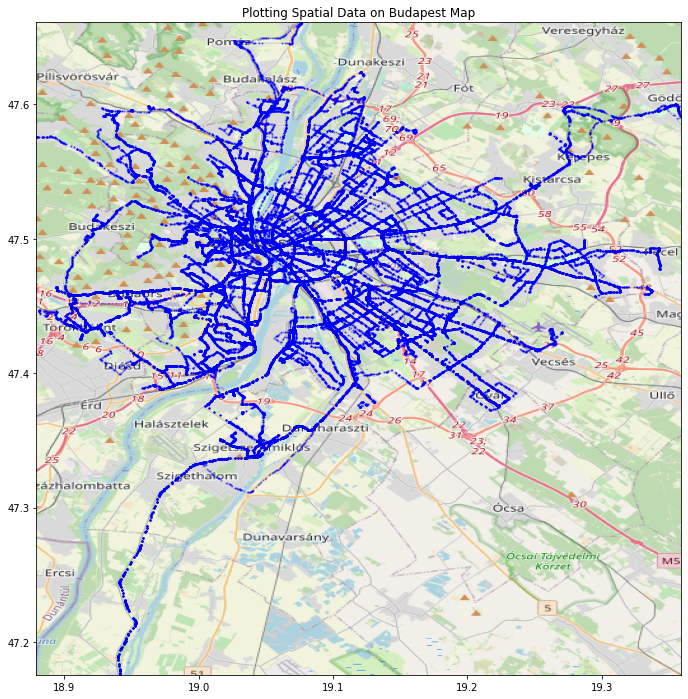

In [40]:
BoundingBox = (shapes.shape_pt_lon.min(), shapes.shape_pt_lon.max(), shapes.shape_pt_lat.min(), shapes.shape_pt_lat.max())

image = plt.imread('big_data/geomap.png')

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(shapes.shape_pt_lon, shapes.shape_pt_lat, zorder=1, alpha= 0.2, c='b', s=1)
ax.set_title('Plotting Spatial Data on Budapest Map')
ax.set_xlim(BoundingBox[0],BoundingBox[1])
ax.set_ylim(BoundingBox[2],BoundingBox[3])
ax.imshow(image, zorder=0, extent=BoundingBox, aspect='equal')

## GeoMap - Stops

Geomap about stops where BKK vehicles stop. (not sorted to night trips only)

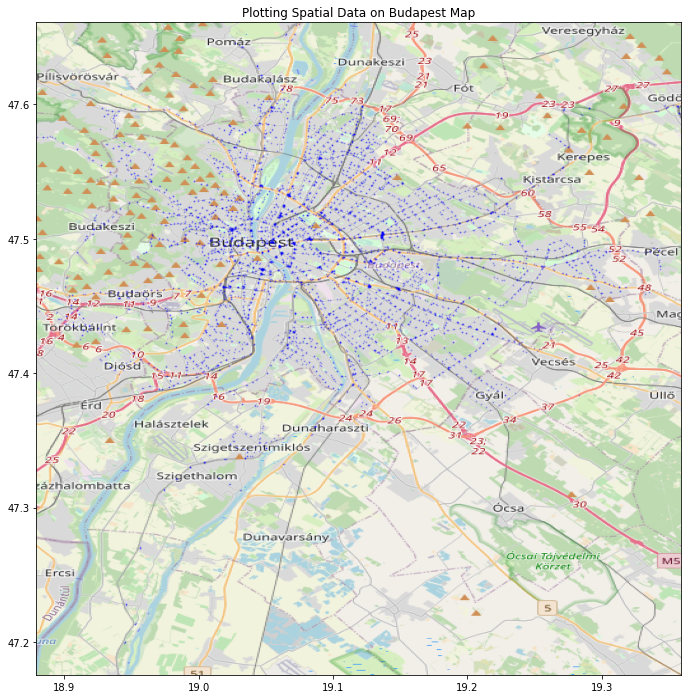

In [41]:
BoundingBox = (shapes.shape_pt_lon.min(), shapes.shape_pt_lon.max(), shapes.shape_pt_lat.min(), shapes.shape_pt_lat.max())

image = plt.imread('big_data/geomap.png')

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(stops.stop_lon, stops.stop_lat, zorder=1, alpha= 0.2, c='b', s=1)
ax.set_title('Plotting Spatial Data on Budapest Map')
ax.set_xlim(BoundingBox[0],BoundingBox[1])
ax.set_ylim(BoundingBox[2],BoundingBox[3])
ax.imshow(image, zorder=0, extent=BoundingBox, aspect='equal')
















































































# Spark

In [42]:
# OS Settings
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

# Find Spark
import findspark
findspark.init()

# Pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, substring, regexp_replace
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

# Pylab
import pylab as pl

# Geopandas
import geopandas as gpd

# Datashader
import datashader as ds
from datashader.utils import lnglat_to_meters
from datashader import transfer_functions as tf
from datashader.spatial import proximity
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
from datashader.transfer_functions import shade, stack

# Holoviews
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade, spread, rasterize
# Misc(s)
from colorcet import fire
import ipywidgets as wg
from IPython.display import  display
import dask.dataframe as dd
from ipywidgets import interactive

Reading in the data:

In [43]:
%%time

pathways = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/pathways.csv")
dates = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/calendar_dates.csv")
shapes = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/shapes.csv")
routes = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/routes.csv")
stop_times = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/stop_times.csv")
stops = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/stops.csv")
trips = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/trips.csv")
calendar_dates = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/calendar_dates.csv")
mapping_interchange = spark.read.option("header", True).option("inferSchema", True).format("csv").load("big_data/mapping_interchange.csv")


CPU times: user 15.4 ms, sys: 3.27 ms, total: 18.6 ms
Wall time: 20.3 s


Data cleaning:

In [44]:
# Remove agency_id - constant value
routes = routes.drop('agency_id')

# Remove exception_type - constant value
calendar_dates = calendar_dates.drop('exception_type')

# Remove pickup_type, drop_off_type - constant value
stop_times = stop_times.drop('pickup_type')
stop_times = stop_times.drop('drop_off_type')

Table structures, features, types:

In [45]:
# Printing out the tables header
print("Table: dates")
dates.printSchema()
print("Table: pathways")
pathways.printSchema()
print("Table: shapes")
shapes.printSchema()
print("Table: routes")
routes.printSchema()
print("Table: stop_times")
stop_times.printSchema()
print("Table: stops")
stops.printSchema()
print("Table: trips")
trips.printSchema()
print("Table: calendar_dates")
calendar_dates.printSchema()

Table: dates
root
 |-- service_id: string (nullable = true)
 |-- date: integer (nullable = true)
 |-- exception_type: integer (nullable = true)

Table: pathways
root
 |-- pathway_id: string (nullable = true)
 |-- pathway_mode: integer (nullable = true)
 |-- is_bidirectional: integer (nullable = true)
 |-- from_stop_id: string (nullable = true)
 |-- to_stop_id: string (nullable = true)
 |-- traversal_time: integer (nullable = true)

Table: shapes
root
 |-- shape_id: string (nullable = true)
 |-- shape_pt_sequence: integer (nullable = true)
 |-- shape_pt_lat: double (nullable = true)
 |-- shape_pt_lon: double (nullable = true)
 |-- shape_dist_traveled: double (nullable = true)

Table: routes
root
 |-- route_id: string (nullable = true)
 |-- route_short_name: string (nullable = true)
 |-- route_long_name: string (nullable = true)
 |-- route_type: integer (nullable = true)
 |-- route_desc: string (nullable = true)
 |-- route_color: string (nullable = true)
 |-- route_text_color: string (nu

## Transforming the data

Collecting the stop IDs and stop names.

In [46]:
# Creating a new table containing only stop names and IDs
stops_names=stops.select("stop_id","stop_name")
# Joining stop times and stop names
df = stop_times.join(stops_names, on="stop_id")
df=df.select("trip_id","stop_id","arrival_time","departure_time","stop_sequence","stop_headsign","shape_dist_traveled","stop_name")

Night trips:

In [47]:
# Filtering out the route IDs above 9000 - these are the night services
night_trips=trips.filter(trips.route_id>=9000)
night_trips.show(6)

+--------+--------+------------------+--------------------+------------+--------------------+--------+---------------------+-------------+-------------+
|route_id| trip_id|        service_id|       trip_headsign|direction_id|            block_id|shape_id|wheelchair_accessible|bikes_allowed|boarding_door|
+--------+--------+------------------+--------------------+------------+--------------------+--------+---------------------+-------------+-------------+
|    9090|B8979910|B89799EVVVCBA-0011|Kispest, Kossuth tér|           0|B89799EVVVCBA-001...|    MY36|                    1|            2|         null|
|    9090|B8979912|B89799EVVVCBA-0011|   Deák Ferenc tér M|           1|B89799EVVVCBA-001...|    IU72|                    1|            2|         null|
|    9090|B8979913|B89799EVVVCBA-0011|Kispest, Kossuth tér|           0|B89799EVVVCBA-001...|    MY36|                    1|            2|         null|
|    9090|B8979915|B89799EVVVCBA-0011|   Deák Ferenc tér M|           1|B89799EVVV

In [48]:
# Linking the stop names and IDs together with the created night data
night_df=night_trips.join(df, on="trip_id")
night_df=night_df.select("trip_id","route_id","service_id","trip_headsign","shape_id","stop_id","arrival_time","departure_time","stop_sequence","shape_dist_traveled","stop_name")
night_df.show(10)

+--------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
| trip_id|route_id|        service_id|    trip_headsign|shape_id|stop_id|arrival_time|departure_time|stop_sequence|shape_dist_traveled|           stop_name|
+--------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03948|    27:17:00|      27:17:00|            0|                0.0|Kispest, Kossuth tér|
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03950|    27:18:00|      27:18:00|            1|              349.0|Simonyi Zsigmond ...|
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03942|    27:18:00|      27:18:00|            2|              627.0|            Sós utca|
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|  

The night_df dataframe contains the most important informations about the trips.

In [49]:
night_df.filter((night_df.trip_headsign==night_df.stop_name) & (night_df.stop_sequence!=0)).show(5)

+---------+--------+-----------------+--------------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
|  trip_id|route_id|       service_id|       trip_headsign|shape_id|stop_id|arrival_time|departure_time|stop_sequence|shape_dist_traveled|           stop_name|
+---------+--------+-----------------+--------------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
| C2051746|    9400| C20517AHPIGy-011|  Budaörsi lakótelep|    T933| F04724|    00:25:00|      00:25:00|           21|            10078.0|  Budaörsi lakótelep|
|  B974828|    9600|B97482K1VVIGy-121|Bécsi út / Vörösv...|    HJ30| F00570|    23:25:00|      23:25:00|            7|             2535.0|Bécsi út / Vörösv...|
| C2120511|    9340| C21205APPIGy-031|       Békásmegyer H|    T571| F00461|    26:05:00|      26:05:00|           28|            13809.0|       Békásmegyer H|
|C14772219|    9791| C14772AHCSZU-021|  

Strange values, probably wrong, misleading data:

In [50]:
# Trip headsign and stop name equeals plus stop sequnece equals 0
night_df.filter((night_df.trip_headsign==night_df.stop_name) & (night_df.stop_sequence==0)).show(20)

+--------+--------+----------------+--------------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
| trip_id|route_id|      service_id|       trip_headsign|shape_id|stop_id|arrival_time|departure_time|stop_sequence|shape_dist_traveled|           stop_name|
+--------+--------+----------------+--------------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
|C2212134|    9900|C22121AVCIGy-091|Rákoskeresztúr, v...|    R948| 011723|    26:46:00|      26:46:00|            0|                0.0|Rákoskeresztúr, v...|
|C2266434|    9900|C22664APPKVA-011|Rákoskeresztúr, v...|    R948| 011723|    26:46:00|      26:46:00|            0|                0.0|Rákoskeresztúr, v...|
|C2266334|    9900|C22663AVCKVA-011|Rákoskeresztúr, v...|    R948| 011723|    26:46:00|      26:46:00|            0|                0.0|Rákoskeresztúr, v...|
|C2266534|    9900|C22665ASZKVA-011|Rákoskeresztúr, 

In [51]:
# Creating table with route ID, trip headsign, number of stops, distance traveled
night_df.groupBy("route_id","trip_headsign").max("stop_sequence","shape_dist_traveled").sort("route_id").show(15)

+--------+--------------------+------------------+------------------------+
|route_id|       trip_headsign|max(stop_sequence)|max(shape_dist_traveled)|
+--------+--------------------+------------------+------------------------+
|    9010|Bécsi út / Vörösv...|                39|                 20997.0|
|    9010|Bécsi út / Vörösv...|                39|                 20997.0|
|    9010|Göncz Árpád város...|                28|                 15708.0|
|    9010|Kelenföld vasútál...|                39|                 21167.0|
|    9010|         Flórián tér|                33|                 18213.0|
|    9010|Puskás Ferenc Sta...|                18|                  9717.0|
|    9070|  Örs vezér tere M+H|                38|                 17258.0|
|    9070|Kelenföld vasútál...|                41|                 18098.0|
|    9080|Móricz Zsigmond k...|                73|                 34100.0|
|    9080|      Gazdagréti tér|                13|                  6201.0|
|    9080|Ci

In [52]:
# Creating table with IDs, trip headsign, average stop sequence and average distance
night_df.groupBy("route_id","trip_headsign").avg("stop_sequence","shape_dist_traveled").show(20)

+--------+--------------------+------------------+------------------------+
|route_id|       trip_headsign|avg(stop_sequence)|avg(shape_dist_traveled)|
+--------+--------------------+------------------+------------------------+
|    9380|Szigetszentmiklós...|              13.0|       6853.074074074074|
|    9010|Puskás Ferenc Sta...|               9.0|       4875.263157894737|
|    9230|Ady Endre utca (T...|              18.5|      11012.700636942674|
|    9600|Bécsi út / Vörösv...| 9.064516129032258|       3684.032258064516|
|    9500|    Újpest-központ M|              28.0|       13661.21052631579|
|    9410|Móricz Zsigmond k...|25.702290076335878|       9794.412213740457|
|    9790|Újpalota, Nyírpal...| 23.23728813559322|      11411.296610169491|
|    9090|Kispest, Kossuth tér|              18.0|       8327.972972972973|
|    9310|Árpádföld, Dezsőf...|22.653846153846153|      10325.720467032967|
|    9180|Kelenföld vasútál...| 18.74131274131274|       9762.633204633205|
|    9800|Dé

Data suggests that we have asymmetrical trips where the 2 directions have different number of stops. (Number of stop sequence % 2 != 0)

5 most popular stops:

In [53]:
night_df_by_stops = night_df.groupby("stop_name").count().sort("count").tail(5)
night_df_by_stops

[Row(stop_name='Kálvin tér M', count=820),
 Row(stop_name='Népliget M', count=982),
 Row(stop_name='Deák Ferenc tér M', count=1104),
 Row(stop_name='Nyugati pályaudvar M', count=1224),
 Row(stop_name='Astoria M', count=1547)]

Information about arrival and departure time:

In [54]:
night_df.describe("arrival_time","departure_time").show()

+-------+------------+--------------+
|summary|arrival_time|departure_time|
+-------+------------+--------------+
|  count|      115107|        115107|
|   mean|        null|          null|
| stddev|        null|          null|
|    min|    00:03:00|      00:03:00|
|    max|    29:23:00|      29:23:00|
+-------+------------+--------------+



Arriving hour distribution

In [55]:
# Visualising arrival times
arr_times = night_df.select('arrival_time', substring('arrival_time', 1,2).alias('hour')).groupby("hour").count().sort("hour")
arr_times = arr_times.withColumnRenamed("count", "cnt").toPandas()

fig = px.bar(arr_times, x='hour', y='cnt', labels={'hour':'Hour', 'cnt':'Number of arrivals'})
fig.update_yaxes(title_text='Number of arrivals', row=1, col=1)
fig.update_xaxes(title_text='Hour', row=1, col=1)
fig.update_layout(autosize=True, width=1100, height=500,
    title='Arriving hour distribution',
)
fig.show()

Arriving hour distribution in table view

In [56]:
arr_times = night_df.select('arrival_time', substring('arrival_time', 1, 2).alias('hour')).groupby("hour").count().sort("hour")
arr_times = arr_times.withColumnRenamed("count", "cnt").toPandas()
arr_times

,hour,cnt
0,00,841
1,01,985
2,02,880
3,03,962
4,04,376
5,05,76
6,23,3842
7,24,23358
8,25,24038
9,26,22359


We have data in which the hour is > 24, because when a vehicle (service) starts before 0:00 the hour doesn't change to 0, it continues 24-25-26...

In [57]:
busStartsBeforeMidnight= night_df.filter((night_df.trip_id=="B897993")).sort("arrival_time").show(16)
busStartsAfterMidnight= night_df.filter((night_df.trip_id == "C2051746")).sort("arrival_time").show(10)

+-------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
|trip_id|route_id|        service_id|    trip_headsign|shape_id|stop_id|arrival_time|departure_time|stop_sequence|shape_dist_traveled|           stop_name|
+-------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
|B897993|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03948|    23:47:00|      23:47:00|            0|                0.0|Kispest, Kossuth tér|
|B897993|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03950|    23:48:00|      23:48:00|            1|              349.0|Simonyi Zsigmond ...|
|B897993|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03942|    23:48:00|      23:48:00|            2|              627.0|            Sós utca|
|B897993|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72|

Replacing hours where it is > 24 to the correct format. (e.g 25 = 1 o'clock)

In [58]:
# Replacing 25 => 01, 26 => 02, 27 => 03, 28 => 04, 29 => 05
night_df=night_df.select('trip_id', 'route_id', 'service_id', 'trip_headsign', 'shape_id', 'stop_id', substring('arrival_time', 1,5).alias('arrival_time'), substring('departure_time', 1,5).alias('departure_time'),  'stop_sequence', 'shape_dist_traveled','stop_name' )
night_df=night_df.withColumn("arrival_time",regexp_replace(col("arrival_time"), "24:", "00:")).withColumn("arrival_time",regexp_replace(col("arrival_time"), "25:", "01:")).withColumn("arrival_time",regexp_replace(col("arrival_time"), "27:", "03:")).withColumn("arrival_time",regexp_replace(col("arrival_time"), "28:", "04:")).withColumn("arrival_time",regexp_replace(col("arrival_time"), "26:", "02:")).withColumn("arrival_time",regexp_replace(col("arrival_time"), "29:", "05:"))
night_df=night_df.withColumn("departure_time",regexp_replace(col("departure_time"), "24:", "00:")).withColumn("departure_time",regexp_replace(col("departure_time"), "25:", "01:")).withColumn("departure_time",regexp_replace(col("departure_time"), "26:", "02:")).withColumn("departure_time",regexp_replace(col("departure_time"), "28:", "04:")).withColumn("departure_time",regexp_replace(col("departure_time"), "27:", "03:")).withColumn("departure_time",regexp_replace(col("departure_time"), "29:", "05:"))
night_df.show()

+--------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
| trip_id|route_id|        service_id|    trip_headsign|shape_id|stop_id|arrival_time|departure_time|stop_sequence|shape_dist_traveled|           stop_name|
+--------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03948|       03:17|         03:17|            0|                0.0|Kispest, Kossuth tér|
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03950|       03:18|         03:18|            1|              349.0|Simonyi Zsigmond ...|
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|    IU72| F03942|       03:18|         03:18|            2|              627.0|            Sós utca|
|B8979924|    9090|B89799EVVVCBA-0011|Deák Ferenc tér M|  

In [59]:
# Displaying stop_id - F01176
night_df.filter(night_df.stop_id=='F01176').sort("arrival_time").show(50)

+---------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
|  trip_id|route_id|        service_id|    trip_headsign|shape_id|stop_id|arrival_time|departure_time|stop_sequence|shape_dist_traveled|           stop_name|
+---------+--------+------------------+-----------------+--------+-------+------------+--------------+-------------+-------------------+--------------------+
| C2165884|    9090|  C21658AVCIGy-071|Deák Ferenc tér M|    AC67| F01176|       00:00|         00:00|            6|             3099.0|Muzsikus cigányok...|
| C1939284|    9090| C19392K1VCIGy-051|Deák Ferenc tér M|    AC67| F01176|       00:00|         00:00|            6|             3099.0|Muzsikus cigányok...|
|C19394151|    9090|  C19394ASZIGy-071|Deák Ferenc tér M|    AC67| F01176|       00:00|         00:00|            6|             3099.0|Muzsikus cigányok...|
|C19393151|    9090|  C19393APPIGy-071|Deák Ferenc t

Real hourly distribution

In [60]:
# Visualising arrival times - corrected
arr_times2 = night_df.select('arrival_time', substring('arrival_time', 1,2).alias('hour')).groupby("hour").count().sort("hour")
arr_times2 = arr_times2.withColumnRenamed("count", "cnt").toPandas()

fig = px.bar(arr_times2, x='hour', y='cnt', labels={'hour':'Hour', 'cnt':'Number of arrivals'})
fig.update_yaxes(title_text='Number of arrivals', row=1, col=1)
fig.update_xaxes(title_text='Hour', row=1, col=1)
fig.update_layout(autosize=True, width=1200, height=500,
    title='Arriving hour distribution',
)
fig.show()

One route for a service during the night:

In [61]:
night_df2= night_df.select(col("trip_id").alias("trip_id2"),col("route_id").alias("route_id2"),col("service_id").alias("service_id2"),col("arrival_time").alias("next_arrival_time"),col("stop_sequence").alias("next_stop_sequence"),col("stop_name").alias("next_stop_name"),col("stop_id").alias("next_stop_id"))
sections = night_df.join(night_df2, ((night_df.stop_sequence+1 == night_df2.next_stop_sequence) & (night_df.trip_id == night_df2.trip_id2) & (night_df.route_id == night_df2.route_id2) & (night_df.service_id == night_df2.service_id2))).select("trip_id","route_id","service_id","trip_headsign","arrival_time","next_arrival_time","stop_name","next_stop_name","stop_sequence","next_stop_sequence").orderBy("trip_id","stop_sequence")
sections.show(40)

+--------+--------+------------------+--------------------+------------+-----------------+--------------------+--------------------+-------------+------------------+
| trip_id|route_id|        service_id|       trip_headsign|arrival_time|next_arrival_time|           stop_name|      next_stop_name|stop_sequence|next_stop_sequence|
+--------+--------+------------------+--------------------+------------+-----------------+--------------------+--------------------+-------------+------------------+
|B8979910|    9090|B89799EVVVCBA-0011|Kispest, Kossuth tér|       00:29|            00:30|   Deák Ferenc tér M|           Astoria M|            0|                 1|
|B8979910|    9090|B89799EVVVCBA-0011|Kispest, Kossuth tér|       00:30|            00:32|           Astoria M|        Kálvin tér M|            1|                 2|
|B8979910|    9090|B89799EVVVCBA-0011|Kispest, Kossuth tér|       00:32|            00:33|        Kálvin tér M|   Szentkirályi utca|            2|                 3|
|B89

## Clustering

All same stop name's stop position in one column (features)

In [62]:
vecAssembler = VectorAssembler(inputCols=["stop_lat", "stop_lon"], outputCol="features")
# Joining night_df and stops together
night_stops= night_df.select("stop_id").join(stops.select('stop_id','stop_lat','stop_lon','stop_name'), on="stop_id").distinct()
new_df = vecAssembler.transform(night_stops)
new_df.show()

+-------+---------+---------+--------------------+--------------------+
|stop_id| stop_lat| stop_lon|           stop_name|            features|
+-------+---------+---------+--------------------+--------------------+
| F01622|47.492051|19.144505|             Sörgyár|[47.492051,19.144...|
| F03454|47.485502|19.243318|         Rétsár utca|[47.485502,19.243...|
| 009011|47.575273|19.266059|Szilasliget, Szon...|[47.575273,19.266...|
| F02021|47.447545|19.037489|    Albertfalva utca|[47.447545,19.037...|
| F03847|47.425316| 19.21444|      Beszterce utca|[47.425316,19.21444]|
| F04777|47.554785|18.927102|        Rácski telep|[47.554785,18.927...|
| F00397|47.569241|18.948558|    Szarvashegy utca|[47.569241,18.948...|
| F03544|47.483315|19.238918|            Kis utca|[47.483315,19.238...|
| F03243|47.509165|19.180364|          Sashalom H|[47.509165,19.180...|
| F01910|47.448485|18.975165|Repülőgépes Szolg...|[47.448485,18.975...|
| F01355|47.462763|19.080141|       Földváry utca|[47.462763,19.

Elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [ ]:
# Clustering
cost = np.zeros(16)

for k in range(2, 16):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('features')
    model = kmeans.fit(new_df.select('features'))
    cost[k] = model.summary.trainingCost

# Plot the cost
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df_cost.insert(0, 'cluster', new_col)


pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Using 5 clusters

In [ ]:
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(new_df.select('features'))
transformed = model.transform(new_df)
transformed.show()

Plotting cluster with different colours

In [ ]:
transformedStops = transformed.select('stop_lat','stop_lon','prediction','stop_name').toPandas()
transformedStops.prediction = pd.Categorical(transformedStops.prediction)

df = px.data.gapminder()
fig = px.scatter_geo(transformedStops,
                     lat='stop_lat', 
                     lon="stop_lon", 
                     color="prediction",
                     hover_name="stop_name")
fig.show()

## Map visualisations

### Stops and shapes during the night

Stops:

In [ ]:
# Stops
stop_locations=stops.select("stop_lat","stop_lon").toPandas()
agg = ds.Canvas().points(stop_locations, 'stop_lon', 'stop_lat')
tf.set_background(tf.shade(agg, cmap=fire),"black")

Shape locations:

In [ ]:
# Shape lat & lon
shape_locations=shapes.select("shape_pt_lat","shape_pt_lon").toPandas()
agg = ds.Canvas().points(shape_locations, 'shape_pt_lon', 'shape_pt_lat')
tf.set_background(tf.shade(agg, cmap=fire),"black")

Stops used by night services:

In [ ]:
night_df2 = night_df.select("stop_id")
stops2= stops.select("stop_id","stop_lat","stop_lon")
night_df_with_stop_loc= night_df2.join(stops2, on="stop_id")
stop_locations=night_df_with_stop_loc.select("stop_lat","stop_lon")
sl=stop_locations.toPandas()

agg = ds.Canvas().points(sl, 'stop_lat', 'stop_lon')
tf.set_background(tf.shade(agg, cmap=fire),"black")

GeoPandas data visualization



Budapest number of night stops per districts



In [ ]:
stops_listings=night_df_with_stop_loc.distinct()
stops_listings=stops_listings.toPandas()

In [ ]:
fp = "big_data/gdf_districts.shx"

data = gpd.read_file(fp)

data['district']=list(np.array(data.index)+1)
data['text']=data['district'].astype(str)+['. kerület' for i in range(23)]

In [ ]:
stops_listings = gpd.GeoDataFrame(stops_listings,crs={'init' :'epsg:4326'}, geometry=gpd.points_from_xy(stops_listings.stop_lon, stops_listings.stop_lat))

In [ ]:
data.to_crs={'init' :'epsg:4326'}
stops_listings.to_crs={'init' :'epsg:4326'}

GeoPandas Spatial Join, to decide which stops in which district

In [ ]:
stops_listings=stops_listings[['stop_id', 'geometry']]
stops_with_districts=gpd.sjoin(stops_listings,data, how='inner', op='within')

In [ ]:
from shapely.geometry import Point
%matplotlib inline

In [ ]:
data['stops_count']=list(stops_with_districts.groupby('district')['stop_id'].count())
data.index=list(range(1,24))
data_json=data.__geo_interface__
data_plot=data

Using Mapbox API and plotly

In [ ]:
MAPBOX_ACCESSTOKEN = 'pk.eyJ1IjoidHlpbWF0eWkiLCJhIjoiY2tpbjUybXV1MDVwYTJ6bWw5cnM1N3pnNiJ9.PWyxWAaVH6lZoXeKtojLIQ'

zmin = data_plot['stops_count'].min()
zmax = data_plot['stops_count'].max()

# Set the data for the map
data = go.Choroplethmapbox(
        geojson = data_json,             #this is your GeoJSON
        locations = data_plot.district,    #the index of this dataframe should align with the 'id' element in your geojson
        z = data_plot.stops_count, #sets the color value
        text = data_plot.text,    #sets text for each shape
        colorbar=dict(thickness=20, ticklen=3, tickformat='',outlinewidth=0), #adjusts the format of the colorbar
        marker_line_width=1, marker_opacity=0.7, colorscale="Viridis", #adjust format of the plot
        zmin=zmin, zmax=zmax,           #sets min and max of the colorbar
        hovertemplate = "<b>%{text}</b><br>" +
                    "%{z:}<br>" +
                    "<extra></extra>")  # sets the format of the text shown when you hover over each shape

# Set the layout for the map
layout = go.Layout(
    title = {'text': f"Budapest number of night stops per districts",
            'font': {'size':24}},       #format the plot title
    mapbox1 = dict(
        domain = {'x': [0, 1],'y': [0, 1]}, 
        center = dict(lat=47.4925, lon=19.051389),
        accesstoken = MAPBOX_ACCESSTOKEN, 
        zoom = 9.5),                      
    autosize=True,
    height=700,
    margin=dict(l=0, r=0, t=40, b=0))

# Generate the map
fig=go.Figure(data=data, layout=layout)
fig.show()

Shapes during the night:

In [ ]:
night_df2= night_df.select("shape_id")
shapes2= shapes.select("shape_id","shape_pt_lat","shape_pt_lon")
night_df_with_shapes= night_df2.join(shapes2, on="shape_id")
shapes_loc= night_df_with_shapes.select("shape_pt_lat","shape_pt_lon").distinct().toPandas()

agg = ds.Canvas().points(shapes_loc, 'shape_pt_lat', 'shape_pt_lon')
tf.set_background(tf.shade(agg, cmap=fire),"black")

### Geomap

Stops used by night services on a geomap:

In [ ]:
web_mercator_x, web_mercator_y = lnglat_to_meters(sl['stop_lon'], sl['stop_lat'])
frame= {'lon': web_mercator_x,'lat':web_mercator_y}
mercator=pd.DataFrame(frame)
hv.extension('bokeh')
map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points(mercator, ['lon', 'lat'])
stopsDS = datashade(points, x_sampling=1, y_sampling=1, cmap=fire, width=900, height=480)

map_tiles * stopsDS

1 km átmérőjű cellák a megállók helyén


In [ ]:
from holoviews import opts, dim
web_mercator_x, web_mercator_y = lnglat_to_meters(sl['stop_lon'], sl['stop_lat'])
frame= {'lon': web_mercator_x,'lat':web_mercator_y}
mercator=pd.DataFrame(frame)
hv.extension('bokeh')
map_tiles  = EsriImagery().opts(alpha=0.5, width=500, height=480, bgcolor='black')
points     = hv.Points(mercator, ['lon', 'lat'])
stopsDS = hv.operation.datashader.shade(rasterize(points,height=50,width=50), cmap=fire)
map_tiles * stopsDS

Megállóktól való távolság megjelenítése:


In [ ]:
sl.rename(columns = {'stop_lon':'x'}, inplace = True) 
sl.rename(columns = {'stop_lat':'y'}, inplace = True) 
cvs = ds.Canvas()
points_agg = cvs.points(sl, x='x', y='y')
points_shaded = dynspread(shade(points_agg, cmap=['salmon',  'salmon']), threshold=1, max_px=1)
proximity_agg = proximity(points_agg)
stack(shade(proximity_agg, cmap=['#603e45', 'black'], how='cbrt'), points_shaded)

Dividing night data into hours:

In [ ]:
night_df_with_hour = night_df.select('shape_id', 'stop_id', substring('arrival_time', 1,2).alias('arrival_time'), 
                                      substring('departure_time', 1,2).alias('departure_time'))
hours_and_stops = night_df_with_hour.join(stops.select("stop_id",col("stop_lon").alias("x"),col("stop_lat").alias("y")), on="stop_id")

# 23-0-1-2-3-4-5
night_df_by_hour0 = hours_and_stops.filter(night_df_with_hour.arrival_time == 0).toPandas()
night_df_by_hour1 = hours_and_stops.filter(night_df_with_hour.arrival_time == 1).toPandas()
night_df_by_hour2 = hours_and_stops.filter(night_df_with_hour.arrival_time == 2).toPandas()
night_df_by_hour3 = hours_and_stops.filter(night_df_with_hour.arrival_time == 3).toPandas()
night_df_by_hour4 = hours_and_stops.filter(night_df_with_hour.arrival_time == 4).toPandas()
night_df_by_hour5 = hours_and_stops.filter(night_df_with_hour.arrival_time == 5).toPandas()
night_df_by_hour23 = hours_and_stops.filter(night_df_with_hour.arrival_time == 23).toPandas()
all = hours_and_stops.toPandas()

Stops used by services - hour distribution:

In [ ]:
def switch(x):
    if x == 0:
      return night_df_by_hour0
    if x == 1:
      return night_df_by_hour1
    if x == 2:
      return night_df_by_hour2
    if x == 3:
      return night_df_by_hour3
    if x == 4:
      return night_df_by_hour4
    if x == 5:
      return night_df_by_hour5
    if x == 23:
      return night_df_by_hour23
    if x == "all":
      return all

# Hour selector
def f(x):
    night_df_by_hour = switch(x)
    agg = ds.Canvas().points(night_df_by_hour, 'x', 'y')
    plt.figure(figsize=(10,10))
    plt.imshow(tf.set_background(tf.shade(agg, cmap=fire),"white"))

w = interactive(f, x=["all",23,0,1,2,3,4,5])
display(w)

In [ ]:
canvas = ds.Canvas(plot_width=300, plot_height=300, x_axis_type='linear', y_axis_type='linear')

color='#603e45'
mode='cbrt'

agg0 = canvas.points(night_df_by_hour0, 'x', 'y')
agg1 = canvas.points(night_df_by_hour1, 'x', 'y')
agg2 = canvas.points(night_df_by_hour2, 'x', 'y')
agg3 = canvas.points(night_df_by_hour3, 'x', 'y')
agg4 = canvas.points(night_df_by_hour4, 'x', 'y')
agg5 = canvas.points(night_df_by_hour5, 'x', 'y')
agg23 = canvas.points(night_df_by_hour23, 'x', 'y')

tf.Images(
         shade(proximity(agg23), cmap=[color, 'black'], how=mode),
         shade(proximity(agg0), cmap=[color, 'black'], how=mode),
         shade(proximity(agg1), cmap=[color, 'black'], how=mode),
         shade(proximity(agg2), cmap=[color, 'black'], how=mode),
         shade(proximity(agg3), cmap=[color, 'black'], how=mode),
         shade(proximity(agg4), cmap=[color, 'black'], how=mode),
         shade(proximity(agg5), cmap=[color, 'black'], how=mode)
)

### 1 kilometer distance

1 km distance from stops

In [ ]:
cvs = ds.Canvas()
points_agg = cvs.points(all, x='x', y='y')
points_shaded = dynspread(shade(points_agg, cmap=['salmon',  'salmon']), threshold=1, max_px=1)
prox = proximity(points_shaded)
#1 km
where_clause = (prox < 0.1) & (prox >0.09)

proximity_shaded = shade(prox.where(where_clause), cmap=['darkturquoise', 'darkturquoise'])
proximity_shaded = set_background(proximity_shaded, 'black')
stack(proximity_shaded, points_shaded)

1 km distance from stops between 23:00-24:00

Buses mostly going from city center to the suburbs


In [ ]:
cvs = ds.Canvas()
points_agg = cvs.points(night_df_by_hour23, x='x', y='y')
points_shaded = dynspread(shade(points_agg, cmap=['salmon',  'salmon']), threshold=1, max_px=1)
prox = proximity(points_shaded)
#1 km
where_clause = (prox < 0.1) & (prox >0.09)

proximity_shaded = shade(prox.where(where_clause), cmap=['darkturquoise', 'darkturquoise'])
proximity_shaded = set_background(proximity_shaded, 'black')
stack(proximity_shaded, points_shaded)

1 km distance from stops between 0:00-5:00

Most of the city is easy to access


In [ ]:
cvs = ds.Canvas()
points_agg = cvs.points(night_df_by_hour3, x='x', y='y')
points_shaded = dynspread(shade(points_agg, cmap=['salmon',  'salmon']), threshold=1, max_px=1)
prox = proximity(points_shaded)
#1 km
where_clause = (prox < 0.1) & (prox >0.09)

proximity_shaded = shade(prox.where(where_clause), cmap=['darkturquoise', 'darkturquoise'])
proximity_shaded = set_background(proximity_shaded, 'black')
stack(proximity_shaded, points_shaded)

1 km distance from stops between 5:00-6:00

Buses go to their bus garage, leaving service


In [ ]:
cvs = ds.Canvas()
points_agg = cvs.points(night_df_by_hour5, x='x', y='y')
points_shaded = dynspread(shade(points_agg, cmap=['salmon',  'salmon']), threshold=1, max_px=1)
prox = proximity(points_shaded)
#1 km
where_clause = (prox < 0.1) & (prox >0.09)

proximity_shaded = shade(prox.where(where_clause), cmap=['darkturquoise', 'darkturquoise'])
proximity_shaded = set_background(proximity_shaded, 'black')
stack(proximity_shaded, points_shaded)